# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.382736e+01     1.331665e+01
 * time: 0.004230022430419922
     1     6.112578e+01     1.129172e+01
 * time: 0.012418985366821289
     2     5.500000e+01     1.588997e+01
 * time: 0.031735897064208984
     3     3.983240e+01     1.135782e+01
 * time: 0.05776691436767578
     4     3.143628e+01     1.035351e+01
 * time: 0.08185696601867676
     5     1.241212e+01     3.574475e+00
 * time: 0.10634088516235352
     6     8.702555e+00     2.382981e+00
 * time: 0.12392091751098633
     7     7.663003e+00     1.731463e+00
 * time: 0.14103984832763672
     8     7.113540e+00     2.710437e+00
 * time: 0.23596596717834473
     9     7.030523e+00     3.110137e+00
 * time: 0.2512819766998291
    10     6.657408e+00     1.649819e+00
 * time: 0.26603102684020996
    11     6.392460e+00     2.014513e+00
 * time: 0.28062987327575684
    12     6.131025e+00     1.228462e+00
 * time: 0.2944509983062744
    13     6.004003e+00     1.692200e+00
 * time

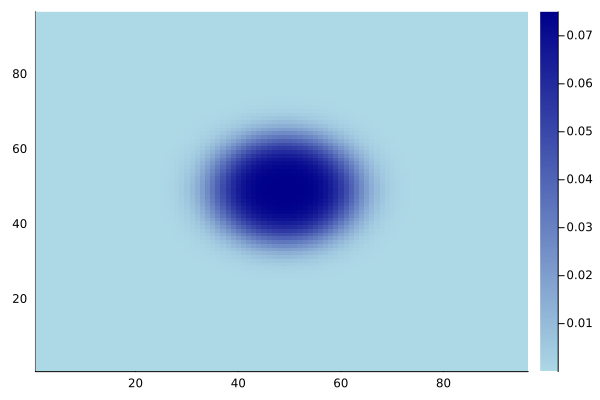

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)